In [63]:
# STeps to follow for this exercise:
# import the required libraries
# read the dataset and understand it
# Explore it and preprocess the text
# Perform topic Modelling on the data set


In [8]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache using fc-list. This may take a moment.


In [9]:
#it is always a good practise to have a look at one article to
#get a better understanding of how the article/data looks like

# open the file using open() function
file = open('Desktop/bbcsports/bbc_sports_articles/003.txt', mode='rt')

# read content using .read() function
text = file.read()

# close the file using .close() function
file.close()
text

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

In [10]:
#now we will go through each file via a loop

#getting the name of all the articles
filenames = os.listdir("Desktop/bbcsports/bbc_sports_articles")

#a datastructure to store the contents of the article
articleContent = []
for file in filenames:
    individualFile = open("Desktop/bbcsports/bbc_sports_articles/" + file, mode='rt')
    text = individualFile.read()
    individualFile.close()
    articleContent.append(text)

len(articleContent)



471

In [32]:
#now that we have read all the data, it is time to explore it and
#preprocess it

#datastructure for clean articles
cleanArticles = []

for i in articleContent:
    cleanArticles.append(i.replace("\n", " ").replace("\'", " "))
    #gettinig rid of all the punctuations and numbers
    cleanArticles = [re.sub("[^a-zA-Z]", " ", x) for x in cleanArticles]
    #getting rid of single character words
    cleanArticles = [" ".join([w for w in x.split() if len(w) > 1]) for x in cleanArticles]
    #converting everything to lowerCase to decrease the total number of unique
    #words
    cleanArticles = [x.lower() for x in cleanArticles]

In [33]:
cleanArticles[55]

'holmes facing fine over trials double olympic champion kelly holmes faces fine of around after opting to miss this weekend trials for the european championship rules brought in last year state athletes who miss trials without proof of injury or illness will forfeit quarter of the fee for that season spokesman for fast track the sport promoters in britain told the times that holmes would be no exception the paper said she was set to earn for the domestic indoor term holmes who won both and gold in athens opened her british indoor campaign by winning the at the norwich union international in glasgow last month she is also set to race at the grand prix in birmingham on february but governing body uk athletics uka said the trials in sheffield were never in her plans it was always kelly plan for the indoor season to prioritise only two uk televised meetings at glasgow and birmingham uka statement said she never intended to compete at the european indoor trials uk athletics can confirm kell

In [34]:
#now that cleaning has been done, it is time to analyse it a bit further
def freq(x, terms = 30):
    #time to combine all the articles
    text = ' '.join([text for text in x])
    #split the text into individual unique words
    all_words = text.split()
    
    #create a dictionary for word-frequency pair
    freqDictionary = nltk.FreqDist(all_words)
    wordsDataFrame = pd.DataFrame({'word': list(freqDictionary.keys()), 'count': list(freqDictionary.values())})
    
    #time to show the top n terms
    d = wordsDataFrame.nlargest(columns = 'count', n = terms)
    
    #time to plot it
    plt.figure(figsize=(20, 5))
    ax= sns.barplot(data = d, x = 'word', y = 'count')
    ax.set(ylabel = 'Count')
    plt.show()

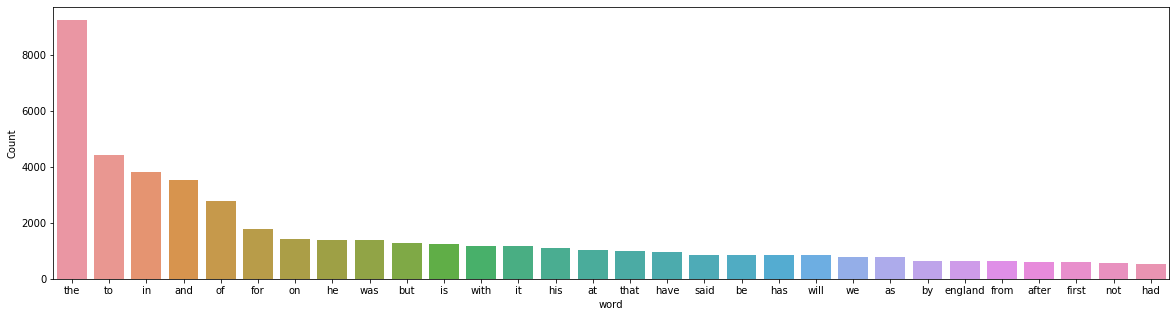

In [35]:
freq(cleanArticles)

In [36]:
# we saw that irrelavant words like the, to are being shown which need to
# be removed so that more relevant words can be showcased
# before we do that, we need to normalize it
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-deps

nlp = spacy.load('en')

# we now lemmatize it
cleanArticles = [' '.join([token.lemma_ for token in nlp(x)]) for x in cleanArticles]

#after normalizing it, we remove the stop words
cleanArticles = [' '.join(w for w in x.split() if nlp.vocab[w].is_stop == False) for x in cleanArticles]

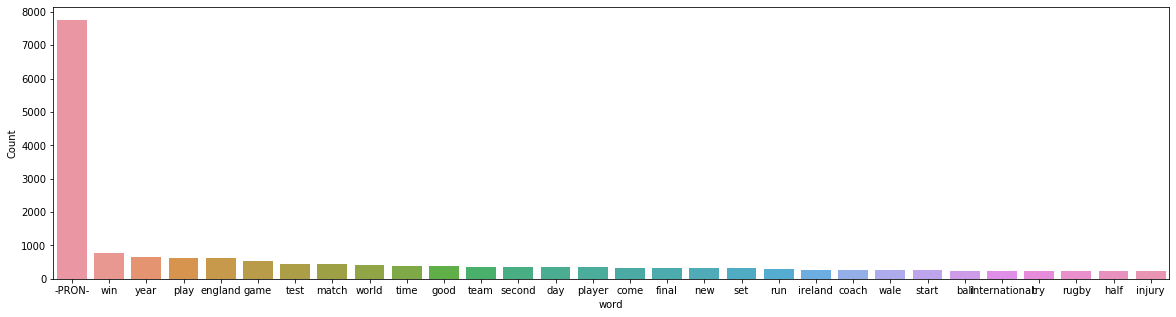

In [37]:
freq(cleanArticles)

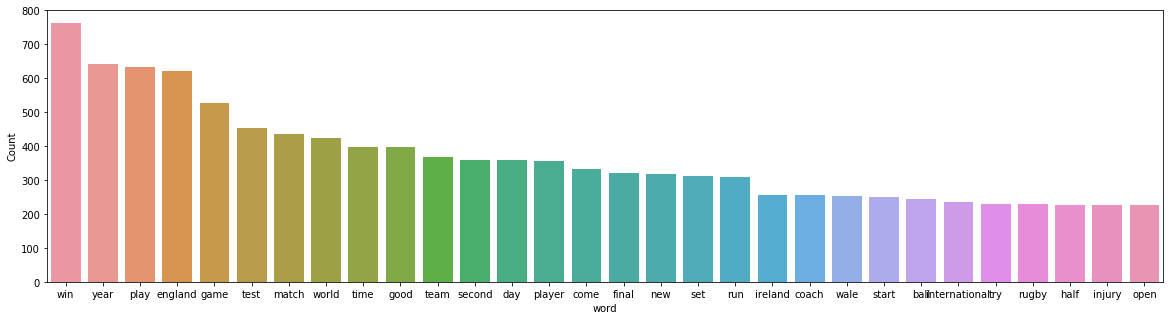

In [38]:
# remove -PRON- tags
cleanArticles = [re.sub('-PRON-',  '', i) for i in cleanArticles]
freq(cleanArticles)

In [39]:
#now we need to get an idea of how many unique words there are in total

def words(x):
    text = ' '.join([article for article in x])
    return set(text.split())

uniqueWord = words(cleanArticles)
len(uniqueWord)

7579

In [40]:
#now its time to have a look at the tfidf factor
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleanArticles)
X.shape
#we convert it into a dataframe
X_df = pd.SparseDataFrame(X, columns=vectorizer.get_feature_names(), index=range(len(cleanArticles)), default_fill_value=0)


#let us have a look at the data
X_df.iloc[:10,1000:1020]



,carlo,carlos,carlsen,carolina,carr,carrier,carroll,carry,carter,cartilage,carve,carwyn,cas,case,casey,cash,casson,cast,castaignede,castigate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.073731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#we will choose the top 1000 most important features
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 most important terms 
                             min_df= 5,
                             max_df = 0.9)
#any words appearing less than 5 times will be ignored or words appearing
#in 90% of the articles will also be ignored
X = vectorizer.fit_transform(cleanArticles)

X.shape # check shape of the document-term matrix

(471, 1000)

In [42]:
#there are too many segregation features. The idea is categorize the articles into
#4 or 5 features
#hence here the idea of dimensionality reductions comes into play
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=4, random_state=12, n_iter=100)
svd_model.fit(X)


TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=12, tol=0.0)

In [43]:
# get column names of document term matrix
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['england', 'win', 'play', 'year', 'game', 'test', 'match', 'world', 'good', 'wale', 'player', 'team', 'ireland', 'final', 'time', 'day', 'new', 'cricket', 'rugby', 'second', 'come', 'france', 'set', 'open', 'run', 'injury', 'coach', 'cup', 'think', 'half', 'tour', 'australia', 'south', 'nation', 'start', 'series', 'international', 'victory', 'champion', 'beat', 'try', 'week', 'captain', 'great', 'william', 'season', 'robinson', 'ball', 'lose', 've']


Topic 1: 
['olympic', 'indoor', 'champion', 'win', 'seed', 'world', 'title', 'race', 'open', 'final', 'european', 'set', 'year', 'holme', 'roddick', 'woman', 'event', 'championship', 'athen', 'compete', 'record', 'round', 'britain', 'athlete', 'birmingham', 'federer', 'hewitt', 'break', 'gold', 'beat', 'jump', 'grand', 'american', 'british', 'medal', 'agassi', 'australian', 'athletic', 'second', 'davenport', 'marathon', 'double', 'madrid', 'russian', 'tennis', 'cross', 'old', 'francis', 'henman', 'safin']


Topic 2: 
['wale', '

In [44]:
#ARTICLE CATEGORIZATION
lsa_topic_matrix = svd_model.transform(X)
lsa_topic_matrix.shape

(471, 4)

In [45]:
articleContent[9]

'Davenport dismantles young rival\n\nTop seed Lindsay Davenport booked her place in the last 16 of the Australian Open with a convincing 6-2 6-4 win over Nicole Vaidisova of the Czech Republic.\n\nThe American had too much power for her 15-year-old opponent, breaking twice in the first set and once in the second. The German-born Vaidisova rallied well at times but was unable to find a way back after falling behind 3-2 in the opening set. Davenport, who closed out with an ace, plays Karolina Sprem in the next round. "I was fully expecting a tough opponent and was able to play well enough to get through it," said Davenport. "I think she hits some great shots. She made some errors but probably some inexperience played a role in that. But she\'s so young and obviously has a big game and has many, many years to improve on that." Sprem, the Croatian 13th seed, saw off Russia\'s Elena Likhovtseva 6-3 6-2. Former world number one\n\npowered her way into the fourth round with a straight sets wi

In [51]:
np.argmax(lsa_topic_matrix[9])

0

In [53]:
df = pd.DataFrame(cleanArticles)



In [60]:
topic = []

for i in np.arange(0, len(lsa_topic_matrix)):
    topicNumber = np.argmax(lsa_topic_matrix[i])
    if(topicNumber == 0):
        topic.append("Cricket")
    elif(topicNumber == 1):
        topic.append("Tennis")
    elif(topicNumber == 2):
        topic.append("Rugby")
    else:
        topic.append("Athletics")

df['topic'] = topic

In [61]:
df

,0,topic
0,wilkinson target ireland jonny wilkinson mass...,Cricket
1,england france england suffer eighth defeat te...,Cricket
2,moody join england lewis moody fly dublin join...,Cricket
3,mcilroy win indoor title jame mcilroy motor aa...,Cricket
4,pavey focus indoor success jo pavey miss janua...,Cricket
5,greek pair set hear kosta kenteris katerina th...,Athletics
6,richardson end short new zealand batsman mark ...,Cricket
7,freeman consider return track olympic champion...,Cricket
8,sri lanka squad set home sri lanka cricketer s...,Cricket
9,davenport dismantle young rival seed lindsay d...,Cricket


In [62]:
lsa_topic_matrix

array([[ 0.41662081, -0.09512855,  0.26743289,  0.05962801],
       [ 0.32020506, -0.0836005 ,  0.27291123,  0.08172949],
       [ 0.40883519, -0.03547554,  0.28719929,  0.10161685],
       ...,
       [ 0.41233637, -0.10462895,  0.12819872,  0.07200633],
       [ 0.27581317, -0.05351784,  0.23400702,  0.11113952],
       [ 0.38812126,  0.03022647,  0.34388177,  0.05368607]])